# Overall evaluation

![header](../figures/logos_partenaires_DC_WOC-ESA.jpg)


**Authors:** Datlas <br>
**Copyright:** 2023 Datlas <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h1><center> Mediterranean: Intercomparison of current products</center></h1>  </h4> 
</div>



<div class="alert alert-block alert-success"> 
<h4><center> The notebook aims to intercompare the current products available in the Mediterranean region.</center> </h4> 
</div>

In [1]:
import sys
sys.path.append('..')
from src.mod_plot import *
from IPython.display import Video
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
output_dir = '../results' 

time_min = '2019-01-01'                                        # time min for analysis
time_max = '2019-12-31'                                        # time max for analysis


region = 'Mediterranean'
lon_min = -5                                          # domain min longitude
lon_max = 25                                          # domain max longitude
lat_min = 35.                                          # domain min latitude
lat_max = 47.                                          # domain max latitude

box_lonlat = {'lon_min':lon_min,'lon_max':lon_max,'lat_min':lat_min,'lat_max':lat_max}

 
<div class="alert alert-info" role="alert">

<h2>0. Read current product data  </h2>

</div>

In [3]:
list_of_maps =  '../data/maps/maps_Mediterranean/DUACS_Mediterranean.nc' 
ds_maps = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')
ds_maps = ds_maps.sel(time=slice(time_min, time_max)) 
ds_maps = ds_maps.assign(uv=1/2*np.sqrt(ds_maps["ugos"]**2+ds_maps["vgos"]**2))
ds_maps.uv.attrs = ds_maps.vgos.attrs
ds_maps.uv.attrs['long_name'] = 'Absolute velocity magnitud'
ds_maps.uv.attrs['standard_name'] = 'surface_geostrophic_sea_water_velocity_magnitud'

list_of_maps =  '../data/maps/maps_Mediterranean/MIOST_Mediterranean.nc' 
ds_maps1 = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')
ds_maps1 = ds_maps1.sel(time=slice(time_min, time_max))
ds_maps1 = ds_maps1.resample(time='1D').mean(dim='time') 
ds_maps1 = ds_maps1.assign(uv=1/2*np.sqrt(ds_maps1["ugos"]**2+ds_maps1["vgos"]**2))
ds_maps1.uv.attrs = ds_maps1.vgos.attrs
ds_maps1.uv.attrs['long_name'] = 'Absolute velocity magnitud'
ds_maps1.uv.attrs['standard_name'] = 'surface_geostrophic_sea_water_velocity_magnitud'
ds_maps1.latitude.attrs['long_name'] = 'Latitude'
ds_maps1.latitude.attrs['units'] = 'degrees_north'
ds_maps1.longitude.attrs['long_name'] = 'Longitude'
ds_maps1.longitude.attrs['units'] = 'degrees_east'


list_of_maps =  '../data/maps/maps_Mediterranean/dADR-SR_Mediterranean/*' 
ds_maps2 = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')
ds_maps2 = ds_maps2.sel(time=slice(time_min, time_max))
ds_maps2 = ds_maps2.resample(time='1D').mean(dim='time')
ds_maps2 = ds_maps2.rename_vars({'uos':'ugos','vos':'vgos'}) 
ds_maps2 = ds_maps2.rename_dims({'lon':'longitude','lat':'latitude'}) 
ds_maps2 = ds_maps2.rename_vars({'lon':'longitude','lat':'latitude'}) 
ds_maps2 = ds_maps2.assign(uv=1/2*np.sqrt(ds_maps2["ugos"]**2+ds_maps2["vgos"]**2))
ds_maps2.uv.attrs = ds_maps2.vgos.attrs
ds_maps2.uv.attrs['long_name'] = 'Absolute velocity magnitud'
ds_maps2.uv.attrs['standard_name'] = 'surface_geostrophic_sea_water_velocity_magnitud'
ds_maps2.latitude.attrs['long_name'] = 'Latitude'
ds_maps2.latitude.attrs['units'] = 'degrees_north'
ds_maps2.longitude.attrs['long_name'] = 'Longitude'
ds_maps2.longitude.attrs['units'] = 'degrees_east'

<div class="alert alert-info" role="alert">

<h2>1. Compare movies </h2>

</div>


<details><summary>  Movies ⤵️  </summary> 

In [4]:
 
name_var = 'uv'
dir_output = '../results/'
methods = ['DUACS','MIOST','dADR-SR']
ds_maps_list = (ds_maps,ds_maps1,ds_maps2)


In [6]:
movie_intercomp(ds_maps_list, methods=methods, name_var=name_var, dir_output=dir_output,
                    region=region, framerate=24)

</details>

<br>

<div class="alert alert-info" role="alert">

<h2>2. Compare current product statistics </h2>

</div>

In [3]:


duacs_stat_uv_output_filename = f'{output_dir}/stat_uv_duacs_'+region+'.nc'   # output statistical analysis filename
duacs_psd_uv_output_filename = f'{output_dir}/psd_uv_duacs_'+region+'.nc'     # output spectral analysis filename

miost_stat_uv_output_filename = f'{output_dir}/stat_uv_miost_'+region+'.nc'  # output statistical analysis filename
miost_psd_uv_output_filename = f'{output_dir}/psd_uv_miost_'+region+'.nc'    # output spectral analysis filename 

sshsstprod_stat_uv_output_filename = f'{output_dir}/stat_uv_dADR-SR_'+region+'.nc'  # output statistical analysis filename
sshsstprod_psd_uv_output_filename = f'{output_dir}/psd_uv_dADR-SR_'+region+'.nc'    # output spectral analysis filename


<details><summary>  Error variance in specific regimes ⤵️  </summary> 

In [4]:
path_stats = [duacs_stat_uv_output_filename,miost_stat_uv_output_filename,sshsstprod_stat_uv_output_filename]
name_methods = ['DUACS', 'MIOST', 'dADR-SR']
compare_plot_stat_uv_by_regimes(path_stats,name_methods)

coastal  \
DUACS    {'mapping_err_u_var [m²/s²]': 0.02699611676989...   
MIOST    {'mapping_err_u_var [m²/s²]': 0.01438102564207...   
dADR-SR  {'mapping_err_u_var [m²/s²]': 0.03001221005031...   

                                          offshore_highvar  \
DUACS    {'mapping_err_u_var [m²/s²]': nan, 'mapping_er...   
MIOST    {'mapping_err_u_var [m²/s²]': nan, 'mapping_er...   
dADR-SR  {'mapping_err_u_var [m²/s²]': nan, 'mapping_er...   

                                           offshore_lowvar  \
DUACS    {'mapping_err_u_var [m²/s²]': 0.01433363448459...   
MIOST    {'mapping_err_u_var [m²/s²]': 0.01160231115107...   
dADR-SR  {'mapping_err_u_var [m²/s²]': 0.01300426673538...   

                                           equatorial_band  \
DUACS    {'mapping_err_u_var [m²/s²]': nan, 'mapping_er...   
MIOST    {'mapping_err_u_var [m²/s²]': nan, 'mapping_er...   
dADR-SR  {'mapping_err_u_var [m²/s²]': nan, 'mapping_er...   

                                                    arctic  \
DUACS    {'mapping_err_u_var [m²/s²]': nan, 'mapping_er...   
MIOST    {'mapping_err_u_var [m²/s²]': nan, 'mapping_er...   
dADR-SR  {'mapping_err_u_var [m²/s²]': nan, 'mapping_er...   

                                                 antarctic  
DUACS    {'mapping_err_u_var [m²/s²]': nan, 'mapping_er...  
MIOST    {'mapping_err_u_var [m²/s²]': nan, 'mapping_er...  
dADR-SR  {'mapping_err_u_var [m²/s²]': nan, 'mapping_er...


<details><summary>  Error and explained variance maps ⤵️  </summary> 

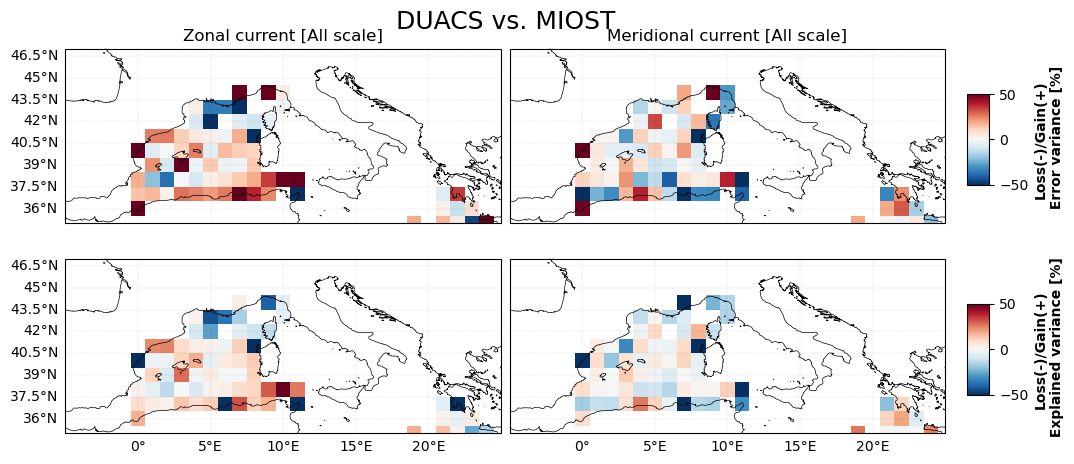

In [15]:
# Plot gridded stats 
compare_stat_score_map_uv_png(miost_stat_uv_output_filename, duacs_stat_uv_output_filename, box_lonlat, ['DUACS','MIOST'], region=region, figsize=(11,7))


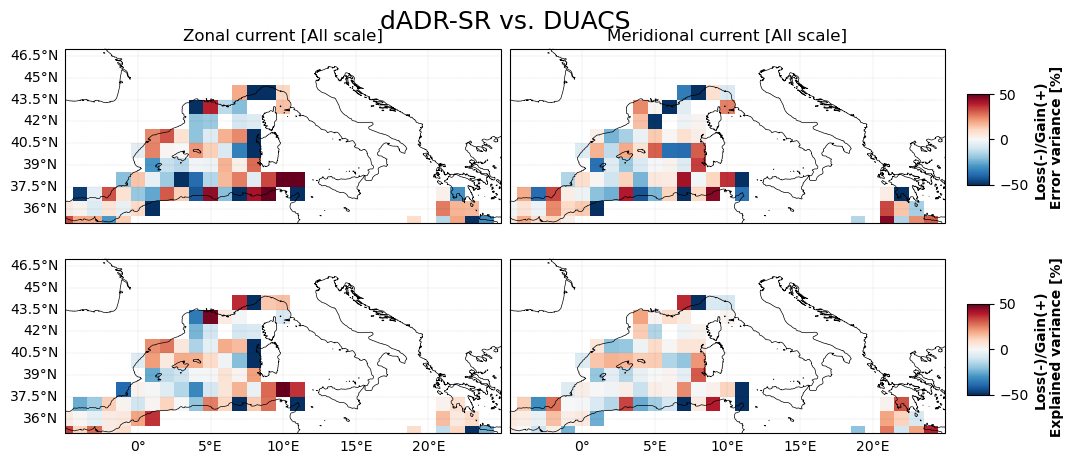

In [16]:
# Plot gridded stats 
compare_stat_score_map_uv_png(sshsstprod_stat_uv_output_filename, duacs_stat_uv_output_filename, box_lonlat, ['dADR-SR','DUACS'], region=region, figsize=(11,7))

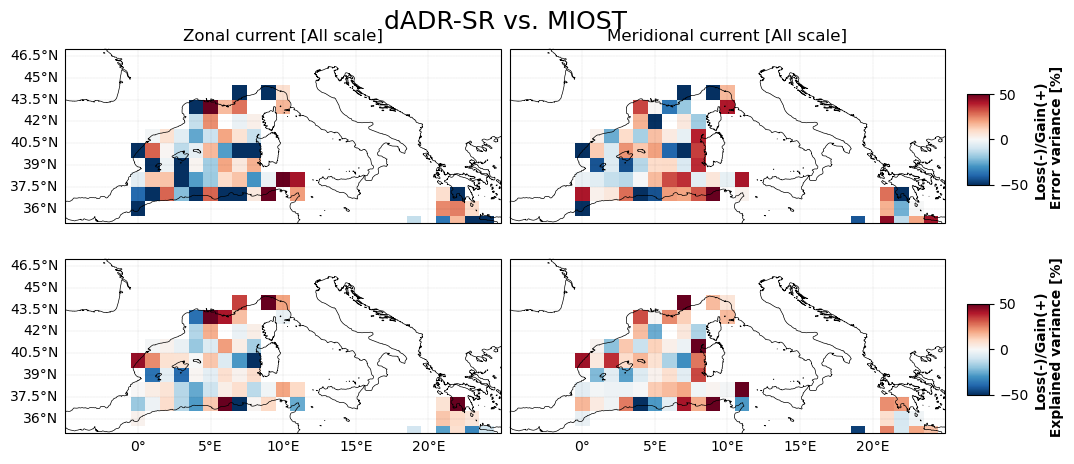

In [17]:
# Plot gridded stats 
compare_stat_score_map_uv_png(sshsstprod_stat_uv_output_filename, miost_stat_uv_output_filename, box_lonlat, ['dADR-SR','MIOST'], region=region, figsize=(11,7))


</details>


</details> 

<br>

In [57]:

! jupyter nbconvert --no-input --to markdown --TagRemovePreprocessor.remove_cell_tags={\"hide_cell\"} Mediterranean_intercomparison.ipynb   
 

[NbConvertApp] Converting notebook Mediterranean_intercomparison.ipynb to markdown
[NbConvertApp] Support files will be in Mediterranean_intercomparison_files/
[NbConvertApp] Making directory Mediterranean_intercomparison_files
[NbConvertApp] Making directory Mediterranean_intercomparison_files
[NbConvertApp] Making directory Mediterranean_intercomparison_files
[NbConvertApp] Writing 5119392 bytes to Mediterranean_intercomparison.md
